This notebook is the personal walkalong code practice done when reading the book - **Data Science from Scratch** First Principles with Python by Joel Grus (2nd Edition) 

The book contains the following chapters:
1. Introduction
2. A Crash Course in Python
3. Visualizing Data
4. Linear Algebra
5. Statistics
6. Probability
7. Hypothesis and Inference
8. Gradient Descent
9. Getting Data
10. Working with Data
11. Machine Learning
12. k-Nearest Neighbors
13. Naive Bayes
14. Simple Linear Regression
15. Multiple Regression
16. Logistic Regression
17. Decision Trees
18. Neural Networks
19. Deep Learning
20. Clustering
21. Natural Language Processing
22. Network Analysis
23. Recommender Systems
24. Databases and SQL
25. MapReduce
26. Data Ethics
27. Go Forth and Do Data Science

(c) Soyinka Sowoolu June 2024







# Chapter 1 - Introduction

The pseudo company is DataSciencester adn current task is to identify who the `key connectors` are among the data scietict network

In [84]:
from ensure import ensure_annotations
from collections import Counter 
from collections import defaultdict
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# import ploty.express as px

from unicodedata import numeric

**Finding Key Connections**

In [2]:
# The users dump is a list of dictionaries of user ids and names respectively as follows:
users = [
    {'id': 0, 'name': 'Hero'},
    {'id': 1, 'name': 'Dunn'},
    {'id': 2, 'name': 'Sue'},
    {'id': 3, 'name': 'Chi'},
    {'id': 4, 'name': 'Thor'},
    {'id': 5, 'name': 'Clive'},
    {'id': 6, 'name': 'Hicks'},
    {'id': 7, 'name': 'Devin'},
    {'id': 8, 'name': 'Kate'},
    {'id': 9, 'name': 'Klein'}   
    ]

# The friendship pairs (connections) is a list of paired ids 
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), 
                    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9), ]


In [3]:
# Create a dict where the keys are user_id and values are list of friends (connections)

# Initialise the dict with empty list for each user_id
friendships = {user['id']: [] for user in users}  # Dictionary Comprehension: {key_expression: value_expression for item in iterable}

# And loop over the friendship pairs to populate it
for i, j in friendship_pairs:
    friendships[i].append(j)
    friendships[j].append(i)
    

In [4]:
friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

What is the average number of connections?

In [26]:
# Find total number of connections
@ensure_annotations
def number_of_friends(user: dict):
    ''' How many friends does `user` have?'''
    user_id = user['id']
    friend_id = friendships[user_id]
    return len(friend_id)

total_connections = sum(number_of_friends(user)
                    for user in users) # sum of connections of all users

num_users = len(users)  # length of the users list
avg_connections = total_connections/ num_users
print(f'Total Connections: {total_connections}')
print(f'Average Connections: {avg_connections}')


Total Connections: 24
Average Connections: 2.4


Find the most connected people

Sort from `most friends` to `least friends`

In [14]:
# Create a list (user_id, number_of_friends)
num_friends_by_id = [(user['id'], number_of_friends(user))
                for user in users]
num_friends_by_id

[(0, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 2),
 (5, 3),
 (6, 2),
 (7, 2),
 (8, 3),
 (9, 1)]

In [19]:
# Sort list of friends from highest friends to lowest friends (number_of_friends largest to smallest)
num_friends_by_id.sort(
    key=lambda id_and_friends: id_and_friends[1],
    reverse=True)
num_friends_by_id



[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

***This is a network metric called `degree of centrality`***

Collect the `friends of friends` -2nd level connections

**Data Scientist You May Know**

In [66]:
# Iterate over friends and collect the friends' friends
@ensure_annotations
def foaf_ids_bad(user: dict):
    ''' foaf is short for friend of a friend'''
    return [foaf_id
            for friend_id in friendships[user['id']]
            for foaf_id in friendships[friend_id]]

# test with users[0] Hero
foaf_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [44]:
print(friendships[0]),print(friendships[1]),print(friendships[2])

# 0 is a friend of his friends (2 & 3) and 3 is friends of both 1 and 3 and 1 and 2 are friends of each other in addition to

[1, 2]
[0, 2, 3]
[0, 1, 3]


(None, None, None)

Produce a count of mutual friends 

In [52]:
# from collections import Counter   # not loaded by default (moved to top of notebook)

@ensure_annotations
def friends_of_friends(user: dict):
    ''' Find the number of mutual friends with other users'''
    user_id = user['id']
    return Counter(
        foaf_id
        for friend_id in friendships[user_id] # for each of my friends
        for foaf_id in friendships[friend_id] # find their friends
        if foaf_id != user_id                # who are not me
        and foaf_id not in friendships[user_id] # who are not my friends already
    )

print(f'Mutual friends of {users[3]} are: {friends_of_friends(users[3])}')

Mutual friends of {'id': 3, 'name': 'Chi'} are: Counter({0: 2, 5: 1})


In [55]:
# List of interest pairs -(user_id, interest)

interests = [
    (0, 'Hadoop'), (0, 'Big Data'), (0, 'HBase'), (0, 'Java'), 
    (0, 'Spark'), (0, 'Storm'), (0, 'Cassandra'), 
    (1, 'NoSQL'), (1, 'MongoDB'), (1, 'Cassandra'), (1, 'HBase'),
    (1, 'Postgres'), (2, 'Python'), (2, 'Scikit-learn'), (2, 'scipy'),
    (2, 'numpy'), (2, 'statsmodels'), (2, 'pandas'), (3, 'R'), (3, 'Python'), 
    (3, 'statistics'), (3, 'regression'), (3, 'probability'), 
    (4, 'machine learning'), (4, 'regression'), (4, 'decision trees'), 
    (4, 'libsvm'), (5, 'Python'), (5, 'R'), (5, 'Java'), (5, 'C++'), 
    (5, 'Haskell'), (5, 'Programming languages'), (6, 'statistics'), 
    (6, 'probability'), (6, 'mathematics'), (6, 'theory'),
    (7, 'machining learning'), (7, 'scikit-learn'), (7, 'Mahout'), 
    (7, 'neural networks'), (8, 'neural networks'), (8, 'deep learning'), 
    (8, 'Big Data'), (8, 'artificial intelligence'), (9, 'Hadoop'), 
    (9, 'Java'), (9, 'MapReduce'), (9, 'Big Data'),    

]

Find users with certain interests

In [59]:
@ensure_annotations
def data_scientist_who_like(target_interest: str):
    ''' Find the ids of all users who like the target interest'''
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]
data_scientist_who_like('Python')

[2, 3, 5]

Build index from interests to users and from users to interests

In [63]:
# Index interests to users
# from collections import defaultdict  # not loaded by default (moved to top of notebook)

# Keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

# Keys are user_id, values are lists ofinterests
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)


It is easy to find who has the most interest in common with a given user

* Iterate over the user's interests
* For each interest , iterate over the other users with that interest
* Keep count of how many times we see each other user


In [65]:
@ensure_annotations
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user['id']]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user['id']
    )

# Test this with users[2]
print(f'The most common interest of {users[2]} with other users are: {most_common_interests_with(users[2])}')



The most common interest of {'id': 2, 'name': 'Sue'} with other users are: Counter({3: 1, 5: 1})


**Salaries and Experience**

In [110]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)
                        ]

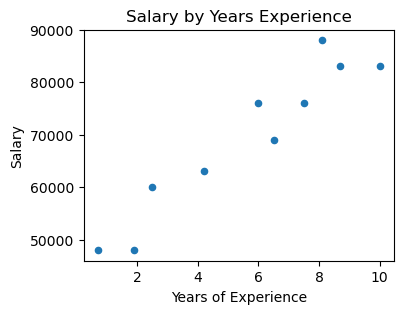

In [95]:
# Create a plot of salary by years of experience using pandas and and labels with matplotlib

pd.DataFrame(salaries_and_tenures).plot(x=1, y=0, kind='scatter', figsize=(4,3))
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary by Years Experience');
 

Find average salary for each tenure

In [111]:
# Keys are years, values are lists of the salaries for each tenure.
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

# Keys are years, each value is average salry for that tenure
average_salary_by_tenure = {
    tenure: sum(salaries)/ len(salaries)
    for tenure, salaries in salary_by_tenure.items()

}
average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

Since there is user having same value not very useful. We will bucket the tenure instead

In [112]:


@ensure_annotations
def tenure_bucket(tenure: int | float):
    if tenure < 2:
        return 'less than two'
    elif tenure < 5:
        return 'between two and five'
    else:
        return 'more than five'


In [107]:
# Keys are tenure buckets, values are lists of salaries for that bucket
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

salary_by_tenure_bucket

defaultdict(list,
            {'more than five': [83000, 88000, 76000, 69000, 76000, 83000],
             'less than two': [48000, 48000],
             'between two and five': [60000, 63000]})

Compute the average salary for each bucket

In [114]:
# Keys are tenure buckets, values are average salary for that bucket
average_salary_by_bucket = {
    tenure_bucket: sum(salaries) /len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}
average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

**Paid Accounts**

In [115]:
@ensure_annotations
def predict_paid_or_unpaid(years_experience : int | float):
    if years_experience < 3.0:
        return 'paid'
    elif years_experience <8.5:
        return 'unpaid'
    else:
        return 'paid'

In [116]:
predict_paid_or_unpaid(3)

'unpaid'

**Topic of Interest**

In [118]:
interests = [
    (0, 'Hadoop'), (0, 'Big Data'), (0, 'HBase'), (0, 'Java'), 
    (0, 'Spark'), (0, 'Storm'), (0, 'Cassandra'), 
    (1, 'NoSQL'), (1, 'MongoDB'), (1, 'Cassandra'), (1, 'HBase'),
    (1, 'Postgres'), (2, 'Python'), (2, 'Scikit-learn'), (2, 'scipy'),
    (2, 'numpy'), (2, 'statsmodels'), (2, 'pandas'), (3, 'R'), (3, 'Python'), 
    (3, 'statistics'), (3, 'regression'), (3, 'probability'), 
    (4, 'machine learning'), (4, 'regression'), (4, 'decision trees'), 
    (4, 'libsvm'), (5, 'Python'), (5, 'R'), (5, 'Java'), (5, 'C++'), 
    (5, 'Haskell'), (5, 'Programming languages'), (6, 'statistics'), 
    (6, 'probability'), (6, 'mathematics'), (6, 'theory'),
    (7, 'machining learning'), (7, 'scikit-learn'), (7, 'Mahout'), 
    (7, 'neural networks'), (8, 'neural networks'), (8, 'deep learning'), 
    (8, 'Big Data'), (8, 'artificial intelligence'), (9, 'Hadoop'), 
    (9, 'Java'), (9, 'MapReduce'), (9, 'Big Data'),    

]

Find the most popular interests by counting the words

* Lowercase each interest (since different users may or may not capitalise their interests)
* Split the words
* Count the words

In [120]:
# Count words
words_and_count = Counter(
                word
                for user, interest in interests
                for word in interest.lower().split()
)
words_and_count

Counter({'big': 3,
         'data': 3,
         'java': 3,
         'python': 3,
         'learning': 3,
         'hadoop': 2,
         'hbase': 2,
         'cassandra': 2,
         'scikit-learn': 2,
         'r': 2,
         'statistics': 2,
         'regression': 2,
         'probability': 2,
         'neural': 2,
         'networks': 2,
         'spark': 1,
         'storm': 1,
         'nosql': 1,
         'mongodb': 1,
         'postgres': 1,
         'scipy': 1,
         'numpy': 1,
         'statsmodels': 1,
         'pandas': 1,
         'machine': 1,
         'decision': 1,
         'trees': 1,
         'libsvm': 1,
         'c++': 1,
         'haskell': 1,
         'programming': 1,
         'languages': 1,
         'mathematics': 1,
         'theory': 1,
         'machining': 1,
         'mahout': 1,
         'deep': 1,
         'artificial': 1,
         'intelligence': 1,
         'mapreduce': 1})

In [126]:
type(words_and_count)


collections.Counter

In [125]:

# list out words that occur more than once
for word, count in words_and_count.most_common():
    if count > 1:
        print(word,count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
neural 2
networks 2


# Chapter Two- A Crash Course in Python

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
list_of_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

easier_to_read_lol = [[1, 2, 3],
                        [4, 5, 6],
                        [7, 8, 9]]

**Module**

In [5]:
import re
my_regex = re.compile('[0-9]+', re.I)

In [1]:
import os